<img src='Image/CBG18.png' width="220px" align="right"> <img src='Image/uff-logo.png' width="200px" align="left"> <img src='Image/logon.jpg' width="200px" align="center"> 

# Synthetic data: a Vertical Prism ( dike model )
### Compute the gravity attraction produced by a dike model (approximated by a vertical prism)
**Reference: Blakely (1996) - Potencial Theory in Gravity and Magnetic Aplications**

In [52]:
# Importing all usefull internal python libraries:
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import pandas as pd
import plotly.plotly  as plty
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
%matplotlib tk
#%matplotlib inline

In [4]:
# importing particular functions implemented by us:
from modules.prism import prism_gz
from modules.plots import prism3D, rectangle
from modules.numerics import addnoise

In [5]:
# Positions and number of points
nx = 100
ny = 100
# to be used in the plot:
shape = (nx,ny)

# define the x and y ranges:
x = np.linspace(-5000., 5000.0, nx) # meters
y = np.copy(x) # for identical axis
#y = np.linspace(-3000.0, 3000.0, ny)
z = -500.0  #np.linspace(-20., -20.0, nx)  # meters (flight hight)

# Computes the mesh of all points
X, Y  = np.meshgrid(x, y)

In [6]:
# Setting the parameters for prism
# dike = [xmin, xmax, ymin, ymax, zmin, zmax, dens]
dike = [-1000., 1000., -500., 500., 500., 3000., 2900.0] # meters + kg/m3

# ---- define the plot area ---- :
area = dike[0:4]
print area
# --- set view area for plotting the rectangle over the contourmap:
view3D = [ np.min(x), np.max(x), np.min(y), np.max(y), z, 7000.0 ]

[-1000.0, 1000.0, -500.0, 500.0]


In [7]:
# create data frame with pandas to save data file:
columns=['xmin','xmax','ymin', 'ymax', 'zmin', 'zmax', 'density(kg/m3)']
datadike = pd.DataFrame( [dike], columns=columns)
datadike.to_csv("Synthetic/dike_model.txt", sep = ' ', index = False, header = True)

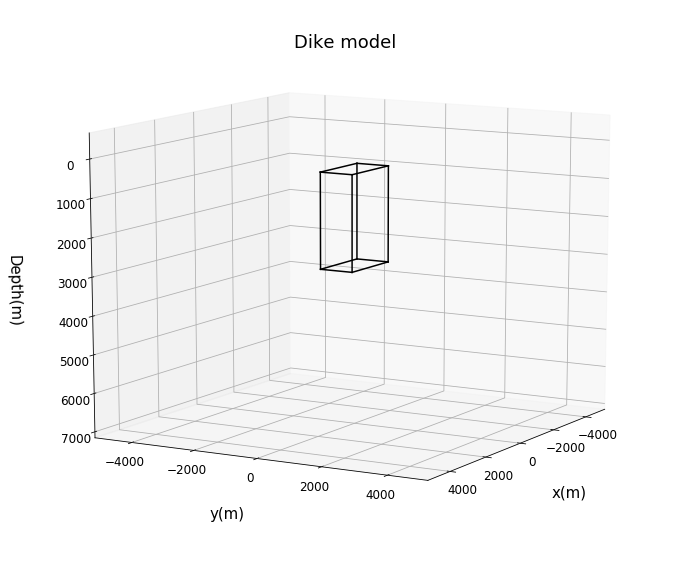

In [8]:
# make the 3D plot for visualization of the model:
py.rcParams['figure.figsize'] = (12.0, 10.0) #set up the plotting area
fig = plt.figure()
m = prism3D(fig, dike, 'black', 12, 30, view3D,'x(m)', 'y(m)', 'Depth(m)', 'Dike model' )

In [9]:
# Calculating the gravity components
gz = prism_gz(X, Y, z, dike)

In [10]:
# Adicionar ruido aos dados, visando simular a realidade das medidas:
gz_noise = addnoise(gz, 0.5, 0.1)

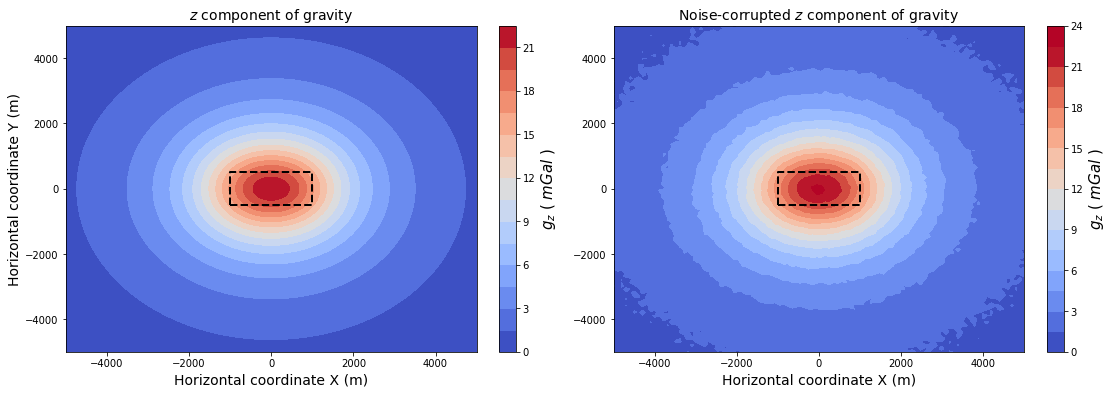

In [11]:
# Ploting all results obtained so far:
plt.close('all')
plt.figure(figsize=(18,6))
fs = 14
#############################################################################
plt.subplot(1, 2, 1)
plt.title('$z$ component of gravity ', fontsize = fs)
p1 = plt.contourf(X, Y, gz, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz), vmax = np.max(gz))
cbar = plt.colorbar(p1, aspect=20, fraction = 0.05, orientation="vertical")
cbar.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 90)
#plt.colorbar()
rectangle(area, style='--k', linewidth=2, fill= None, alpha=1., label=None)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)
#############################################################################
plt.subplot(1, 2, 2)
plt.title('Noise-corrupted $z$ component of gravity ', fontsize = fs)
p2 = plt.contourf(X, Y, gz_noise, 20,cmap = plt.cm.coolwarm, vmin = np.min(gz), vmax = np.max(gz))
cbar = plt.colorbar(p2, aspect=20, fraction = 0.05, orientation="vertical")
cbar.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 90)
#plt.colorbar()
rectangle(area, style='--k', linewidth=2, fill= None, alpha=1., label=None)
#plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

#plt.savefig('figures/prism-gravity')

plt.show()

In [12]:
## escrevendo o arquivo com os dados:#
Xn = np.reshape(X, (nx*ny) )
Yn = np.reshape(Y, (nx*ny) )
GZ = np.reshape(gz_noise, (nx*ny) )
elev = np.linspace(z,z,nx*ny)

# create data frame with pandas to save data file:
columns=['X(m)','Y(m)','elev(m)', 'gz(mgal)']
data = np.transpose( (Xn, Yn, elev, GZ) )
data = pd.DataFrame(data, columns=columns)
#print data
data.to_csv("Synthetic/synthetic_data.txt", index=False, encoding='utf8', sep = ' ')

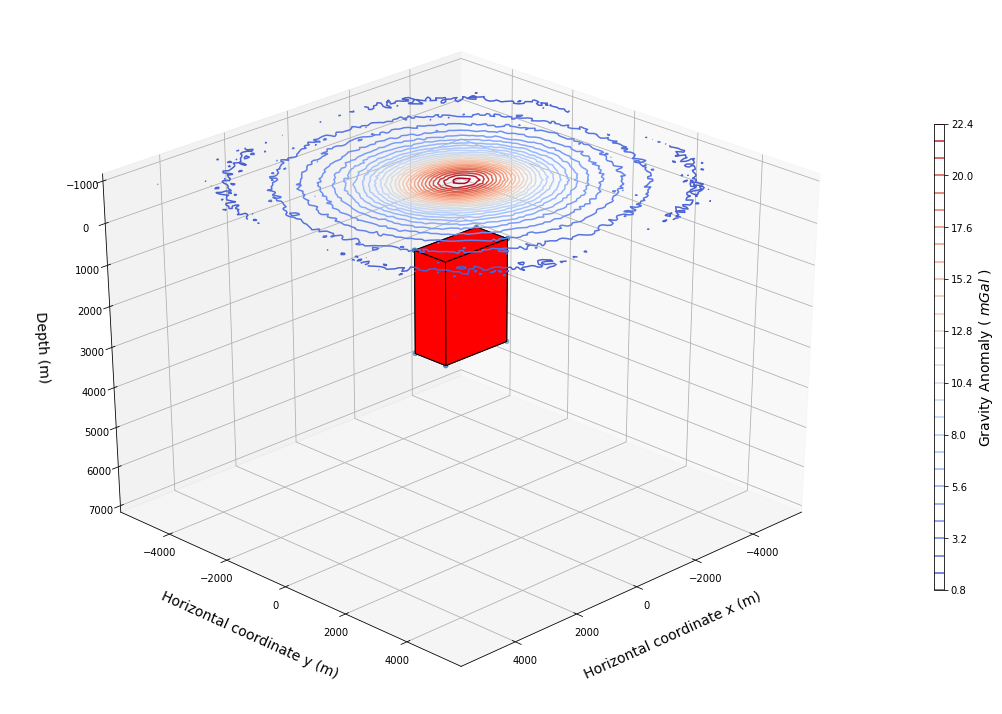

In [49]:
# ---------- Plot of model and data in slice ---------------------------------:
py.rcParams['contour.negative_linestyle'] = 'solid'
plt.close('all')
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d')

# ------------------- vertical gravitational atraction plot ------------------:
p = ax.contour(X, Y, gz_noise, 30, inline=True, zdir='z', offset=2*z, cmap='coolwarm', vmin = np.min(gz), vmax = np.max(gz) )
cbar = fig.colorbar(p, aspect = 50, fraction = 0.01, orientation="vertical")
cbar.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)
    
# vertices of a prism
x1, x2 = dike[0:2]
y1, y2 = dike[2:4]
z1, z2 = dike[4:6]
v = np.array([[x1, y1, z1], [x1, y2, z1], [x2, y2, z1],  [x2, y1, z1], 
              [x1, y1, z2], [x1, y2, z2], [x2, y2, z2],  [x2, y1, z2]])
ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])

# generate list of sides of our prism
verts = [[v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
         [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]]]

# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='red', linewidths=1, edgecolors='k', alpha=0.9))

#change size projection
x_scale=1.
y_scale=1.
z_scale=1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

#labels
ax.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=fs)
ax.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=fs)
ax.set_zlim(-1000,7000)
ax.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)

#visualization angle
ax.view_init(30, 45)
ax.invert_zaxis()
plt.tight_layout(True)
plt.show()


In [53]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]]
    )
]
py.iplot(data)

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.